In [50]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Network Flow Modeling


## Solution Approach

To solve the network flow model, I have utilized CP-SAT solver from Google OR-Tools for constraint solving and NetworkX to visualize flow paths. 

### Problem Constraints

The high level constraints applied in the model are:

- **Product Conservation:** The total flow into a process step must equal the process step amount.
- **Flow Conservation:** The total flow out of a process step must be less than or equal to the process step amount.
- **Sequentiality:** A process step must occur before a subsequent process step is completed.
- **Flow Simplicity:** Minimize number of unique product flows out of each process step to prevent trivial solution differences.

### Solution Structure

Two Python classes have been developed to enable repeatable flow data preparation, model setup, model solving, and visualization.
The `NetworkFlowModel` class is used to generate the network flow model and solve it using the CP-SAT solver.
`NetworkFlowModel.solve` outputs a custom `NetworkFlowSolution` object.
The `NetworkFlowSolution` class provides an interface for a solved `NetworkFlowModel` that generates a graph network using NetworkX.
The graph network is generated from the solution data and provides a visual representation of the flow paths.


## Solutions

In [51]:
import pandas as pd
from utils import NetworkFlowModel

wb = pd.ExcelFile("../data/NetworkFlowProblem-Data.xlsx")
data = {} 
for sheet in wb.sheet_names:
    data[sheet] = wb.parse(sheet)

### Input 1

In [52]:
data["Input1"].head()

,product,treatment,send_from_cnt,to_processing_cnt,for_process,Week,Amount
0,P11,I300,NaN,AUSTRIA,Sourcing,1,36207.19
1,P11,I300,NaN,FRANCE,Sourcing,1,3022.10
2,P11,I300,NaN,HUNGARY,Sourcing,1,14839.81
3,P11,I300,NaN,GERMANY,Sourcing,1,312.47
4,P11,I300,NaN,ROMANIA,Sourcing,1,5551.43


In [53]:
input1_model = NetworkFlowModel(data["Input1"])
input1_solution = input1_model.solve()

In [54]:
input1_solution.demands

,Process1_id,Process1_Cnt,Process1_Amount,Process1_Week,Process2_id,Process2_Cnt,Process2_Amount,Process2_Week,Process3_id,Process3_Cnt,Process3_Amount,Process3_Week,Process4_id,Process4_Cnt,Process4_Amount,Process4_Week,Process5_id,Process5_Cnt,Process5_Amount,Process5_Week
0,0,AUSTRIA,6859.19,1,6.0,AUSTRIA,6859.19,1.0,9.0,SLOVENIA,6859.19,4.0,11.0,SLOVENIA,6859.19,8.0,12.0,HUNGARY,6859.19,8.0
1,2,HUNGARY,300.00,1,5.0,HUNGARY,300.00,1.0,8.0,ROMANIA,300.00,4.0,15.0,ROMANIA,300.00,8.0,13.0,ROMANIA,300.00,8.0
2,0,AUSTRIA,1000.00,1,6.0,AUSTRIA,1000.00,1.0,9.0,SLOVENIA,1000.00,4.0,14.0,FRANCE,1000.00,8.0,22.0,MOLDOVA,1000.00,13.0
3,0,AUSTRIA,5000.00,1,7.0,AUSTRIA,5000.00,2.0,10.0,SLOVENIA,5000.00,5.0,17.0,FRANCE,5000.00,9.0,25.0,MOLDOVA,5000.00,18.0
4,0,AUSTRIA,6348.00,1,7.0,AUSTRIA,6348.00,2.0,24.0,SLOVENIA,6348.00,17.0,30.0,SLOVENIA,6348.00,23.0,29.0,BULGARIA,6348.00,23.0
5,0,AUSTRIA,17000.00,1,7.0,AUSTRIA,17000.00,2.0,10.0,SLOVENIA,17000.00,5.0,18.0,HUNGARY,17000.00,9.0,31.0,ROMANIA,17000.00,23.0
6,2,HUNGARY,10138.81,1,21.0,HUNGARY,10138.81,10.0,23.0,HUNGARY,10138.81,14.0,34.0,HUNGARY,10138.81,24.0,35.0,HUNGARY,10138.81,24.0
7,2,HUNGARY,1901.00,1,21.0,HUNGARY,1901.00,10.0,27.0,AUSTRIA,1901.00,20.0,37.0,SLOVENIA,1901.00,25.0,38.0,HUNGARY,1901.00,27.0
9,4,ROMANIA,1476.90,1,20.0,ROMANIA,1476.90,10.0,28.0,FRANCE,1476.90,22.0,39.0,FRANCE,4499.00,28.0,40.0,HUNGARY,4499.00,28.0
8,1,FRANCE,3022.10,1,19.0,FRANCE,3022.10,10.0,33.0,FRANCE,3022.10,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


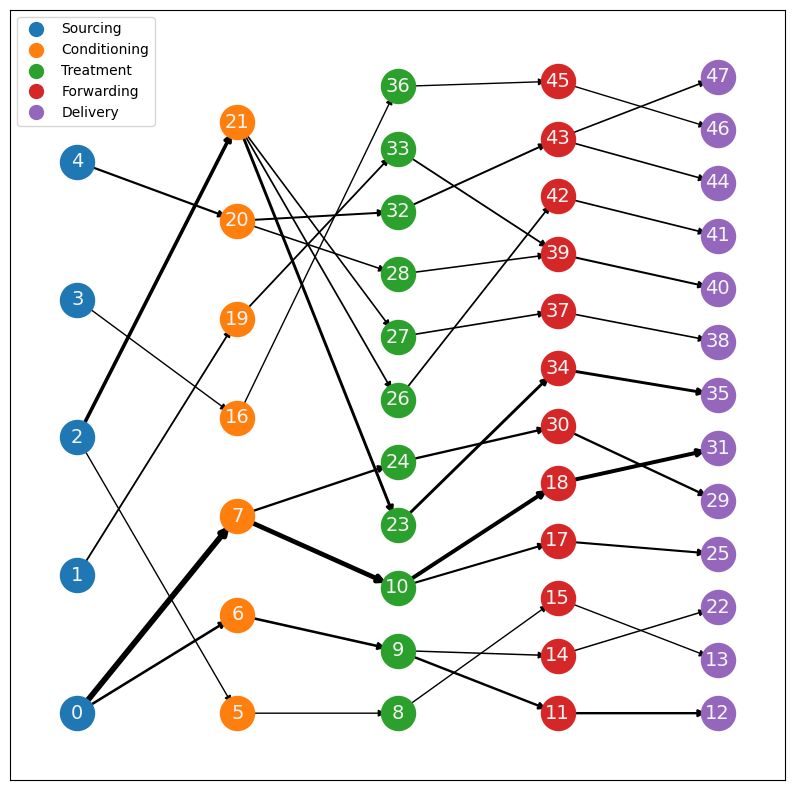

In [55]:
input1_solution.visualize()

In [76]:

input1_solution.ivisualize()

### Input 2

In [56]:
data["Input2"].head()

,product,treatment,send_from_cnt,to_processing_cnt,for_process,Week,Amount
0,P11,I003,NaN,AUSTRIA,Sourcing,1,2222
1,P11,I003,AUSTRIA,AUSTRIA,Conditioning,1,2222
2,P11,I003,AUSTRIA,SLOVENIA,Treatment,5,2222
3,P11,I003,SLOVENIA,CROATIA,Forwarding,14,1454
4,P11,I003,SLOVENIA,CROATIA,Forwarding,18,768


In [57]:
input2_model = NetworkFlowModel(data["Input2"])
input2_solution = input2_model.solve()

In [58]:
input2_solution.demands

,Process1_id,Process1_Cnt,Process1_Amount,Process1_Week,Process2_id,Process2_Cnt,Process2_Amount,Process2_Week,Process3_id,Process3_Cnt,Process3_Amount,Process3_Week,Process4_id,Process4_Cnt,Process4_Amount,Process4_Week,Process5_id,Process5_Cnt,Process5_Amount,Process5_Week
0,0,AUSTRIA,1454.0,1,1.0,AUSTRIA,1454.0,1.0,2.0,SLOVENIA,1454.0,5.0,3.0,CROATIA,1454.0,14.0,5.0,CROATIA,1454.0,21.0
1,0,AUSTRIA,768.0,1,1.0,AUSTRIA,768.0,1.0,2.0,SLOVENIA,768.0,5.0,4.0,CROATIA,768.0,18.0,6.0,BOSNIA-HERZ.,768.0,23.0


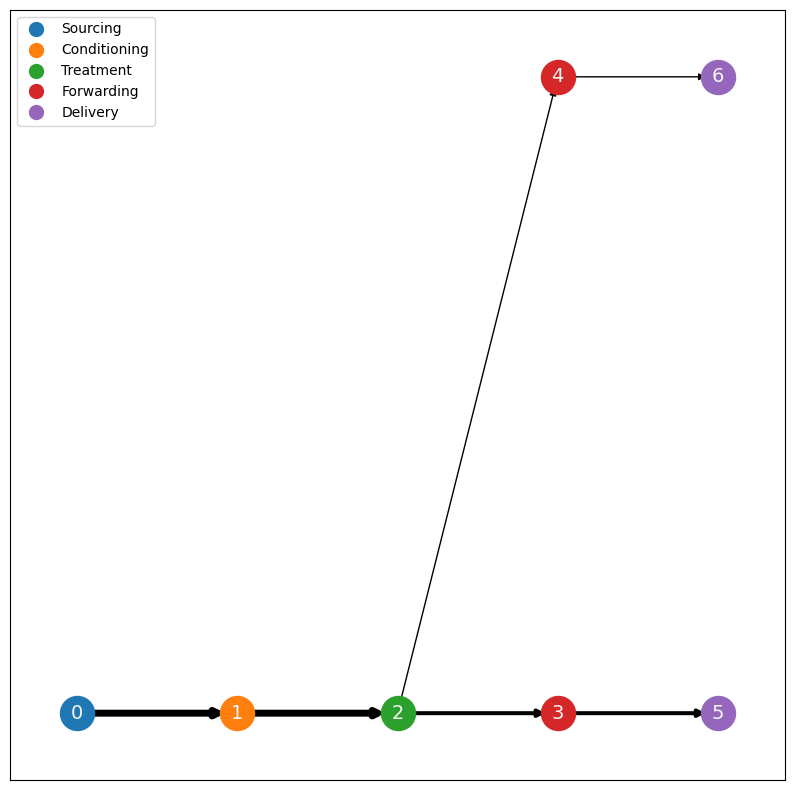

In [59]:
input2_solution.visualize()

In [75]:

input2_solution.ivisualize()

### Input 3

In [60]:
data["Input3"].head()

,product,treatment,send_from_cnt,to_processing_cnt,for_process,Week,Amount
0,P11,I100,NaN,HUNGARY,Sourcing,1,533
1,P11,I100,NaN,AUSTRIA,Sourcing,1,3331
2,P11,I100,HUNGARY,HUNGARY,Conditioning,1,533
3,P11,I100,AUSTRIA,AUSTRIA,Conditioning,2,3331
4,P11,I100,AUSTRIA,SLOVENIA,Treatment,5,3331


In [61]:
input3_model = NetworkFlowModel(data["Input3"])
input3_solution = input3_model.solve()

In [62]:
input3_solution.demands

,Process1_id,Process1_Cnt,Process1_Amount,Process1_Week,Process2_id,Process2_Cnt,Process2_Amount,Process2_Week,Process3_id,Process3_Cnt,Process3_Amount,Process3_Week,Process4_id,Process4_Cnt,Process4_Amount,Process4_Week,Process5_id,Process5_Cnt,Process5_Amount,Process5_Week
0,0,HUNGARY,533.0,1,2.0,HUNGARY,533.0,1.0,5.0,SLOVENIA,533.0,6.0,7.0,SLOVENIA,533.0,12.0,8.0,FRANCE,533.0,15.0
1,1,AUSTRIA,1343.0,1,3.0,AUSTRIA,1343.0,2.0,4.0,SLOVENIA,1343.0,5.0,6.0,FRANCE,1343.0,9.0,9.0,FRANCE,1343.0,20.0
2,1,AUSTRIA,1875.0,1,3.0,AUSTRIA,1875.0,2.0,4.0,SLOVENIA,1875.0,5.0,6.0,FRANCE,1875.0,9.0,10.0,SPAIN,1875.0,23.0
3,1,AUSTRIA,113.0,1,3.0,AUSTRIA,113.0,2.0,4.0,SLOVENIA,113.0,5.0,6.0,FRANCE,113.0,9.0,11.0,PORTUGAL,113.0,23.0


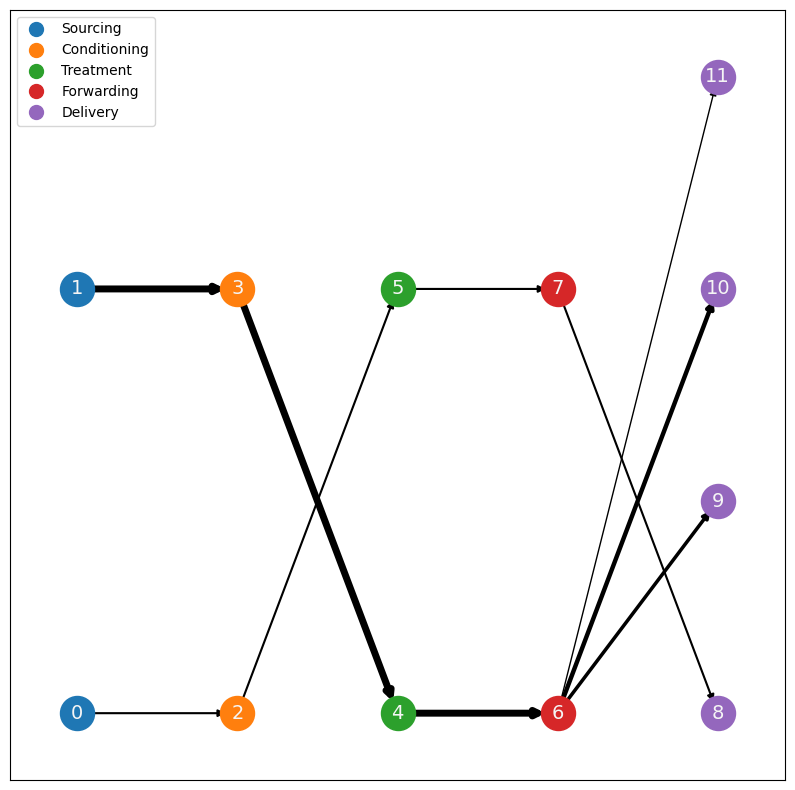

In [63]:
input3_solution.visualize()

In [74]:

input3_solution.ivisualize()

### Input 4

In [64]:
data["Input4"].head()

,product,treatment,send_from_cnt,to_processing_cnt,for_process,Week,Amount
0,P11,I320,NaN,AUSTRIA,Sourcing,1,795
1,P11,I320,NaN,SLOVENIA,Sourcing,1,405
2,P11,I320,AUSTRIA,AUSTRIA,Conditioning,1,795
3,P11,I320,SLOVENIA,AUSTRIA,Conditioning,1,405
4,P11,I320,AUSTRIA,SLOVENIA,Treatment,19,1200


In [65]:
input4_model = NetworkFlowModel(data["Input4"])
input4_solution = input4_model.solve()

In [66]:
input4_solution.demands

,Process1_id,Process1_Cnt,Process1_Amount,Process1_Week,Process2_id,Process2_Cnt,Process2_Amount,Process2_Week,Process3_id,Process3_Cnt,Process3_Amount,Process3_Week,Process4_id,Process4_Cnt,Process4_Amount,Process4_Week,Process5_id,Process5_Cnt,Process5_Amount,Process5_Week
0,0,AUSTRIA,795.0,1,2.0,AUSTRIA,795.0,1.0,4.0,SLOVENIA,1200.0,19.0,5.0,SLOVENIA,1200.0,23.0,6.0,HUNGARY,1200.0,23.0
1,1,SLOVENIA,405.0,1,3.0,AUSTRIA,405.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


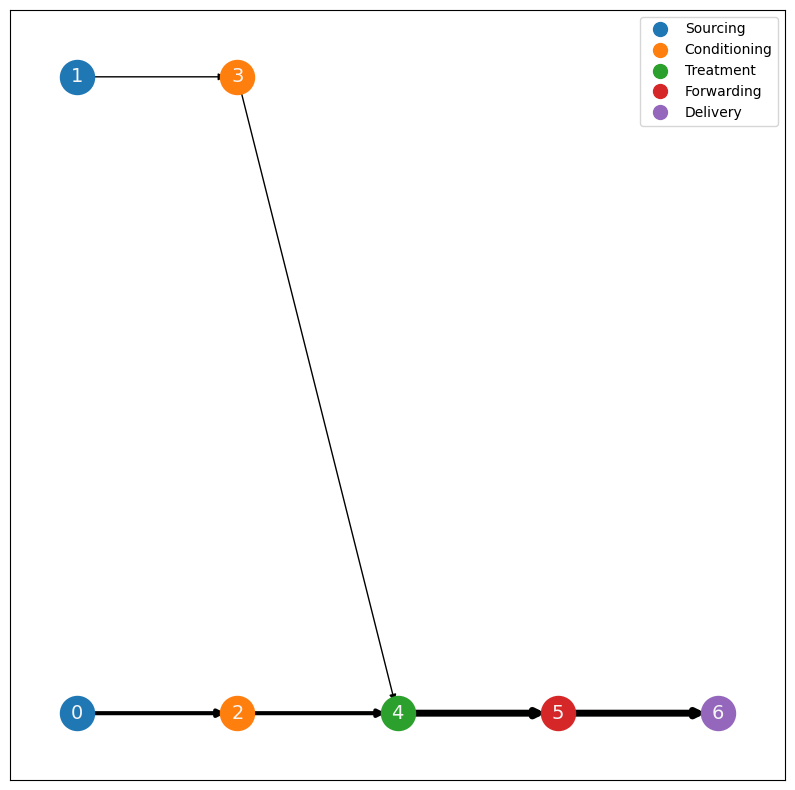

In [67]:
input4_solution.visualize()

In [73]:

input4_solution.ivisualize()

### Input 5

In [68]:
data["Input5"].head()

,product,treatment,send_from_cnt,to_processing_cnt,for_process,Week,Amount,Unnamed: 7,Unnamed: 8
0,P11,I800,FRANCE,FRANCE,Conditioning,1,1064.81,NaN,NaN
1,P11,I800,ITALY,ITALY,Conditioning,1,1462.82,NaN,NaN
2,P11,I800,AUSTRIA,AUSTRIA,Conditioning,1,124.30,NaN,NaN
3,P11,I800,ROMANIA,AUSTRIA,Conditioning,1,6675.88,NaN,NaN
4,P11,I800,SLOVENIA,AUSTRIA,Conditioning,1,47.19,NaN,NaN


In [69]:
input5_model = NetworkFlowModel(data["Input5"])
input5_solution = input5_model.solve()

In [70]:
input5_solution.demands

,Process1_id,Process1_Cnt,Process1_Amount,Process1_Week,Process2_id,Process2_Cnt,Process2_Amount,Process2_Week,Process3_id,Process3_Cnt,Process3_Amount,Process3_Week,Process4_id,Process4_Cnt,Process4_Amount,Process4_Week,Process5_id,Process5_Cnt,Process5_Amount,Process5_Week
0,16,AUSTRIA,124.30,1,2.0,AUSTRIA,124.30,1.0,19.0,SLOVENIA,124.30,4.0,9.0,ITALY,124.30,8.0,5.0,TURKEY,124.30,13.0
1,17,ROMANIA,6675.88,1,3.0,AUSTRIA,6675.88,1.0,25.0,SLOVENIA,6723.07,10.0,13.0,ITALY,6723.07,14.0,6.0,TURKEY,6723.07,18.0
2,18,SLOVENIA,47.19,1,4.0,AUSTRIA,47.19,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15,ITALY,911.48,1,1.0,ITALY,911.48,1.0,20.0,FRANCE,911.48,5.0,10.0,TURKEY,1623.48,11.0,7.0,TURKEY,1854.53,23.0
3,14,FRANCE,712.00,1,0.0,FRANCE,712.00,1.0,22.0,FRANCE,712.00,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15,ITALY,231.05,1,1.0,ITALY,231.05,1.0,21.0,ITALY,231.05,6.0,11.0,TURKEY,231.05,12.0,NaN,NaN,NaN,NaN
7,15,ITALY,320.29,1,1.0,ITALY,320.29,1.0,23.0,FRANCE,320.29,9.0,12.0,TURKEY,673.10,14.0,8.0,TURKEY,673.10,24.0
6,14,FRANCE,352.81,1,0.0,FRANCE,352.81,1.0,24.0,FRANCE,352.81,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


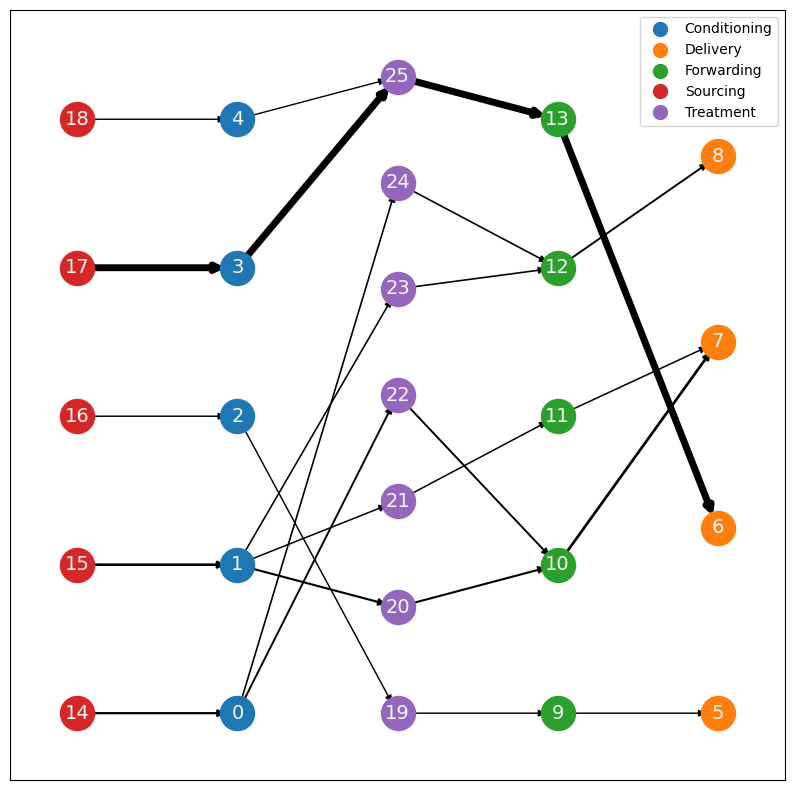

In [71]:
input5_solution.visualize()

In [72]:
input5_solution.ivisualize()